# Welcome to **Lab 2**! 

Please start by making your own copy of this Google Colab notebook (you will need a Google account). 

In this lab, we will get some practice with defining MDPs and simulating the emergence of abnormal decision-making in anxiety using a model proposed by [Zorowitz et al. (2019)](https://cpsyjournal.org/article/10.1162/CPSY_a_00026/). The idea of their theory is that different symptoms of anxiety can be explained by the belief that one's own future actions will not be effective at avoiding threat. We can test such a theory in a simulation experiment in which an RL agent iteratively interacts with a grid world environment using a sequence of actions. 

Learning objectives:  

* Interact with open code 
* Instantiate a gridworld environment
* Compute value function under a pessimistic policy using value iteration
* Translate a decision making task into an MDP

As you work on the lab, you may re-use or modify any of the code above. You are welcome to work in groups, though each student should turn in an individual notebook with answers by uploading to this [Google Drive folder](https://drive.google.com/drive/folders/1Tf99kycwrvAFJ_D7stayd8RkrWOXEds1), using the following naming convention: *LastName*-*FirstName*-*Lab2*.

# Codebase installation

In [ ]:
pip install git+https://github.com/ndawlab/seqanx.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/ndawlab/seqanx.git to /tmp/pip-req-build-69qyky38
  Running command git clone -q https://github.com/ndawlab/seqanx.git /tmp/pip-req-build-69qyky38
  Created wheel for sisyphus: filename=sisyphus-0.2-py3-none-any.whl size=25703 sha256=0856d54bbe533a686abd7884a23e4b191902e18fa7e1a13be2882b19051e4803
  Stored in directory: /tmp/pip-ephem-wheel-cache-z7iz8gpv/wheels/f7/fc/c1/d47c8d7f1bb0b86b095179290edace4be14a547b87fe1ce5ee
Successfully built sisyphus


In [ ]:
# Load dependencies.
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from sisyphus.envs import OpenField
sns.set_style('white')
sns.set_context('notebook', font_scale=1.5)
img_dir = os.path.join('..','figures')
%matplotlib inline

from sisyphus.mdp import ValueIteration
from mpl_toolkits.axes_grid1 import make_axes_locatable
from palettable.colorbrewer.diverging import RdBu_9 as palette

The cell above loads all the dependencies we need. The two main classes we will use are the *OpenField* environment and the *ValueIteration* algorithm for solving the MDP. Navigate to the original [codebase](https://github.com/ndawlab/seqanx) and locate each.

Based on the information in the *OpenField* constructor function, answer the following questions about the environment: 

**How many total states are there in the grid?**

There are 121 (11x11) states in this grid.

**In which state will the agent receive a reward?**


The agent will receive a reward when it goes to the location of [1,2]

**In which state will the agent encounter a threat?**


The agent will receive a reward when it goes to the location of [1,8]

**Which states are defined as "terminal" states (states after which the episode ends)?**


The terminal state is the final state of an episode, which is followed by a reset to a starting state. In the ValueIteration class, if delta (Q-q) is lest than tol (tolerance for stopping criteria), then the episode terminates and the next one starts, indicated by line 86 - if np.all(delta < self.tol): break

**Give the lines in the *ValueIteration* class that implement the main loop of the value iteration algorithm (no need to copy the code).**


lines 58-88 (def_q_solve function)

# Reproducing the findings

w = 1.0


/usr/local/lib/python3.7/dist-packages/sisyphus/mdp/_misc.py:13: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "pessimism" failed type inference due to: non-precise type pyobject
During: typing of argument at /usr/local/lib/python3.7/dist-packages/sisyphus/mdp/_misc.py (16)

File "../usr/local/lib/python3.7/dist-packages/sisyphus/mdp/_misc.py", line 16:
def pessimism(arr, w):
    <source elided>
    """Pessimistic learning rule."""
    return w * np.max(arr) + (1 - w) * np.min(arr)
    ^

  @jit
/usr/local/lib/python3.7/dist-packages/numba/core/object_mode_passes.py:152: NumbaWarning: Function "pessimism" was compiled in object mode without forceobj=True.

File "../usr/local/lib/python3.7/dist-packages/sisyphus/mdp/_misc.py", line 14:
@jit
def pessimism(arr, w):
^

  state.func_ir.loc))
/usr/local/lib/python3.7/dist-packages/numba/core/object_mode_passes.py:162: NumbaDeprecationWarning: 
Fall-back from the nopython compilation path 

w = 0.5


/usr/local/lib/python3.7/dist-packages/sisyphus/mdp/_dp.py:144: UserWarning: Reached maximum iterations.
  warn('Reached maximum iterations.')
/usr/local/lib/python3.7/dist-packages/sisyphus/mdp/_misc.py:13: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "pessimism" failed type inference due to: non-precise type pyobject
During: typing of argument at /usr/local/lib/python3.7/dist-packages/sisyphus/mdp/_misc.py (16)

File "../usr/local/lib/python3.7/dist-packages/sisyphus/mdp/_misc.py", line 16:
def pessimism(arr, w):
    <source elided>
    """Pessimistic learning rule."""
    return w * np.max(arr) + (1 - w) * np.min(arr)
    ^

  @jit
/usr/local/lib/python3.7/dist-packages/numba/core/object_mode_passes.py:152: NumbaWarning: Function "pessimism" was compiled in object mode without forceobj=True.

File "../usr/local/lib/python3.7/dist-packages/sisyphus/mdp/_misc.py", line 14:
@jit
def pessimism(arr, w):
^

  state.func_ir.loc))
/usr/

w = 0


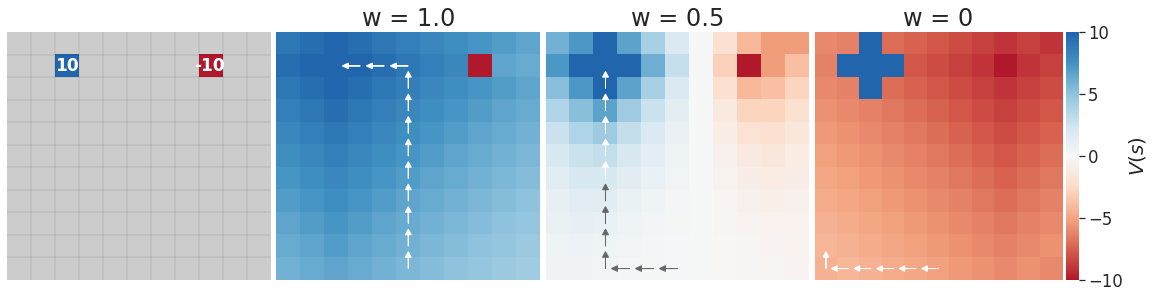

In [ ]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Define parameters.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Simulation parameters.
# This number dictates the weight of pessimistic belief - that is,
# how strongly does the agent believe it can take the
# reward maximizing action in the future (1 = "I can always maximize", "0 = I can never maximize")
weights = [1.0, 0.5, 0]

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Environment setup and visualization.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
## Initialize figure.
fig = plt.figure(figsize=(16,4))
cmap = palette.get_mpl_colormap()
colors = palette.hex_colors

## Initialize plots and divider.
gs = gridspec.GridSpec(1,4)
gs.update(left=0.01, right=0.94, bottom=0.04, top=0.9, hspace=0, wspace=0.02)

## Initialize environment.
gym = OpenField()

## Plot environment.
ax = plt.subplot(gs[0])
ax = gym.plot_field(reward_color=colors[-1], punishment_color=colors[0], ax=ax, 
                    annot_kws=dict(fontsize=17,fontweight='semibold',color='w'))

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Value iteration and visualization.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

i = 0

for w in weights:
    
    print('w = ' + str(w))

    ## Initialize value iteration.
    qvi = ValueIteration(policy='pessimism', gamma=0.95, w=w)
    
    ## Solve for Q-values.
    qvi = qvi.fit(gym)
    V = qvi.V.reshape(gym.shape)
    V[1,[2,-3]] = [10, -10]         # fill in value of terminal states (this is just for plotting).
    
    ## Solve for policy.
    pi = qvi.pi
    
    ## Initialize canvas.
    ax = plt.subplot(gs[i+1])
    if i == 2:
        cbar = True
        divider = make_axes_locatable(ax)
        cbar_ax = divider.append_axes("right", size="5%", pad=0.05)
    else:
        cbar = False
        cbar_ax = None
    i = i+1
    
    ## Plotting.
    sns.heatmap(V, cmap=cmap, center=0, vmin=-10, vmax=10, cbar=cbar,
                xticklabels=[], yticklabels=[], ax=ax, cbar_ax=cbar_ax)
    ax = gym.plot_policy(ax, pi, color=np.where(np.abs(V.flatten()[pi]) < 2, '0.4', 'w'))
    ax.set_title(f'w = {w}', fontsize=24)
  
    ## Update colorbar.
    if cbar:
        cbar = ax.collections[0].colorbar
        cbar.set_label(r'$V(s)$', fontsize=20)

# Exercises  

**For the fully optimistic agent (*$w$=1*), is there any state in the grid world from which the agent could end up visiting the threat state? Why or why not?**

No, because the agent will always choose a move with the highest expected value and the other states around the threat state will always have a higher value, so the threat state will never be chosen. 

**In your own words, explain the agent's behavior in the fully pessimistic case (*$w$=0*). What happens to the value such that the agent gets stuck in an avoidance pattern? (hint: think about the relative contribution of the reward vs. threat to the value function)**

In the fully pessimistic case, the weight on the probability of choosing the correct choice is 0, so the agent will never choose the highest value state. The agent thinks that threats are always likely and will avoid taking the option with the highest value, and therefore will always make a lower value choice. In avoiding the threat, the agent never achieves the reward. 

**Starting with 0, try a few different levels of $w$. How optimistic would the agent need to become to start "avoiding avoidance"?** 

w = 0
w = 0.25
w = 0.5
w = 1.0


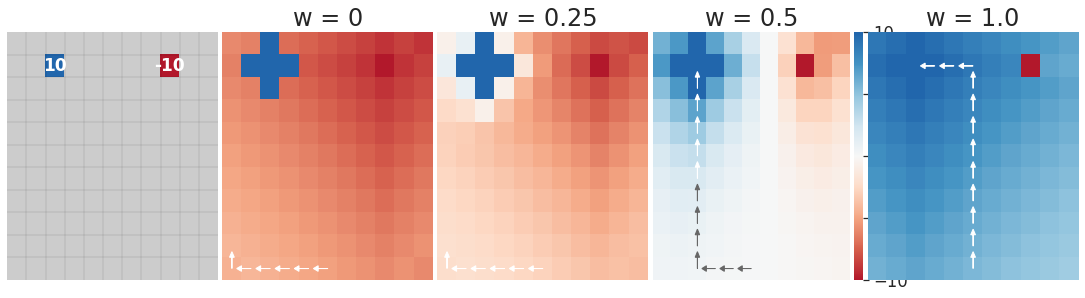

In [ ]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Define parameters.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Simulation parameters.
# This number dictates the weight of pessimistic belief - that is,
# how strongly does the agent believe it can take the
# reward maximizing action in the future (1 = "I can always maximize", "0 = I can never maximize")
weights = [0, 0.25, 0.5, 1.0]

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Environment setup and visualization.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
## Initialize figure.
fig = plt.figure(figsize=(16,4))
cmap = palette.get_mpl_colormap()
colors = palette.hex_colors

## Initialize plots and divider.
gs = gridspec.GridSpec(1,5)
gs.update(left=0.01, right=0.94, bottom=0.04, top=0.9, hspace=0, wspace=0.02)

## Initialize environment.
gym = OpenField()

## Plot environment.
ax = plt.subplot(gs[0])
ax = gym.plot_field(reward_color=colors[-1], punishment_color=colors[0], ax=ax, 
                    annot_kws=dict(fontsize=17,fontweight='semibold',color='w'))

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Value iteration and visualization.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

i = 0

for w in weights:
    
    print('w = ' + str(w))

    ## Initialize value iteration.
    qvi = ValueIteration(policy='pessimism', gamma=0.95, w=w)
    
    ## Solve for Q-values.
    qvi = qvi.fit(gym)
    V = qvi.V.reshape(gym.shape)
    V[1,[2,-3]] = [10, -10]         # fill in value of terminal states (this is just for plotting).
    
    ## Solve for policy.
    pi = qvi.pi
    
    ## Initialize canvas.
    ax = plt.subplot(gs[i+1])
    if i == 2:
        cbar = True
        divider = make_axes_locatable(ax)
        cbar_ax = divider.append_axes("right", size="5%", pad=0.05)
    else:
        cbar = False
        cbar_ax = None
    i = i+1
    
    ## Plotting.
    sns.heatmap(V, cmap=cmap, center=0, vmin=-10, vmax=10, cbar=cbar,
                xticklabels=[], yticklabels=[], ax=ax, cbar_ax=cbar_ax)
    ax = gym.plot_policy(ax, pi, color=np.where(np.abs(V.flatten()[pi]) < 2, '0.4', 'w'))
    ax.set_title(f'w = {w}', fontsize=24)
  
    ## Update colorbar.
    if cbar:
        cbar = ax.collections[0].colorbar
        cbar.set_label(r'$V(s)$', fontsize=20)

Once an agent's weight = 0.5, the agent will begin to 'avoid avoidance'. This makes sense because in practice this means there is a 50/50 chance (or more) that an agent will choose the highest value option or not. As w increases, an agent becomes more optimistic. Once the chances of choosing the highest value are equal to or greater than choosing another option, an agent is no longer primarily avoidant. 

**Based on your simulation, list at least two behavioral interventions you might try to address an agent's avoidance.**

- cognitive behavioral therapy to work through an agent's inherent pessimism
- adding more rewards to a gridspace to provide more encouragement to avoid avoidance, hopefully increasing w over time

**How would you test for the success of this intervention based on the behavioral predictions from this model? (hint: think about what experiment you would run and what parameters you would measure)**

I would try to measure the w value of a patient's behavior, based on the trajectory the patient takes throughout the experiment. Instead of simulating the patient's behavior based on a given w, I would estimate the w based on the behavior the patient exhibits. If w increases, then the behavioral intervention was successful.

**Would the model as written apply to all forms of anxiety? Why or why not?**

No, this model would not apply to all forms of anxiety. An individual can be anxious without being avoidant. This problem defines anxiety as avoidance, but in the real world anxiety can take many forms that do not necessarily involve avoidance. 

Using the examples from class as a guide, choose a task you have encountered in the literature (e.g. "go-nogo task", "social navigation task") and try to translate it to an MDP. Some questions to guide you: 

* Does this task have sequential structure? That is, does the agent need to take multiple actions before reaching a goal state?
* What are the states of the task? 
* What actions are available to the agent in this task? Is every action available in every state?
* How does an episode terminate? I.e. what are the terminal states, and from where can they be reached?
* How would you define the transition and reward functions?

The go/no go task can be translated to an MDP. Patients either make an action based on a 'go' signal or withold an action based on a 'no go' signal. Witholding an action is supposed to be more difficult if there are many go signals preceeding. Participants must maximize potential reward by paying attention to stimuli and not making actions incorrectly. Participants will maximize reward when they figure out which signal is the go signal and which signal is the no go signal and then properly act/not act with those signals. 

*   Yes, the task does have sequential structure because the agent must learn which stimuli is the 'go' signal and which stimuli is the 'no go' signal. In different episodes these signals can differ so the agent has to relearn. To achieve the goal state the agent must learn which stimuli is which and then correctly maintain that representation. 
*  The task has two states - one with the go signal and one with the no go signal 
* There are to actions, one is doing the action and one is not doing the action. The agent can do either action in any given state but only one is rewarded depending on the stimuli presented (the state)
* The episode finishes when the agent completes an amount of trials determined by the experimenter. A new episode may switch stimuli entirely, or reverse the stimuli. 
* The transition function is the point where an agent receives a reward based on a previous state action pair and then sees the state following that reward. This would mean the transition function is when an agent makes (or does not make) an action and then sees whether that action was rewarded and what the next state is. 
* The reward function is the reward given when a proper action (or inaction) is taken. 